In [28]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [29]:
def load_csv(filename, skip_rows):
    df = pd.read_csv(filename, skiprows=skip_rows, header=0)
    df.drop(df.columns[0], axis=1, inplace=True)
    return df

def calculate_final_avg(df, retailer_0_start, retailer_1_start):
    df_even = df.iloc[:, retailer_0_start::6]
    retailer_0_price = round(df_even.iloc[-1].mean(), 2)
    
    df_odd = df.iloc[:, retailer_1_start::6]
    retailer_1_price = round(df_odd.iloc[-1].mean(), 2)
    return [retailer_0_price, retailer_1_price]

def plot_price_comparison_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        filename = f'./experiment_data/{strategy_profile}{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_avg(df, 2, 5)

        labels = [f'R1_weight_{weight}', f'R2_weight_{weight}']
        ax.bar(labels, avg_prices)
    ax.set_ylabel('Final Price')
    plt.title(title)
    plt.plot()

def plot_distance_comparison_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        filename = f'./experiment_data/{strategy_profile}{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_avg(df, 1, 4)

        labels = [f'R1_weight_{weight}', f'R2_weight_{weight}']
        ax.bar(labels, avg_prices)
    ax.set_ylabel('Final Market Share')
    plt.title(title)
    plt.plot()

def plot_profit_comparison_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        filename = f'./experiment_data/{strategy_profile}{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_avg(df, 0, 3)

        labels = [f'R1_weight_{weight}', f'R2_weight_{weight}']
        ax.bar(labels, avg_prices)
    ax.set_ylabel('Final Profit')
    plt.title(title)
    plt.plot()

In [30]:
def plot_combined_profit_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        
        filename = f'./experiment_data/{strategy_profile[0]}_D_{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_avg(df, 0, 3)
        
        filename2 = f'./experiment_data/{strategy_profile[1]}_D_{weight}.csv'
        df2 = load_csv(filename2, 34)
        avg_prices2 = calculate_final_avg(df2, 0, 3)
        
        labels = [f'R1_{strategy_profile[0]}_weight_{weight}', 
                  f'R2_{strategy_profile[0]}_weight_{weight}']
        ax.bar(labels, avg_prices)
        
        labels2 = [f'R1_{strategy_profile[1]}_weight_{weight}',
                  f'R2_{strategy_profile[1]}_weight_{weight}']
        ax.bar(labels2, avg_prices2)
    
    ax.set_ylabel('Final Profit')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.plot()

def plot_combined_price_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        filename = f'./experiment_data/{strategy_profile[0]}_D_{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_avg(df, 2, 5)
        
        filename2 = f'./experiment_data/{strategy_profile[1]}_D_{weight}.csv'
        df2 = load_csv(filename2, 34)
        avg_prices2 = calculate_final_avg(df2, 2, 5)
        
        labels = [f'R1_{strategy_profile[0]}_weight_{weight}', 
                  f'R2_{strategy_profile[0]}_weight_{weight}']
        ax.bar(labels, avg_prices)
        
        labels2 = [f'R1_{strategy_profile[1]}_weight_{weight}',
                  f'R2_{strategy_profile[1]}_weight_{weight}']
        ax.bar(labels2, avg_prices2)
    
    ax.set_ylabel('Final Price')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.plot()

def plot_combined_market_share_graph(strategy_profile, title):
    weights = [2, 6, 10]
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for weight in weights:
        filename = f'./experiment_data/{strategy_profile[0]}_D_{weight}.csv'
        df = load_csv(filename, 34)
        avg_prices = calculate_final_avg(df, 1, 4)
        
        filename2 = f'./experiment_data/{strategy_profile[1]}_D_{weight}.csv'
        df2 = load_csv(filename2, 34)
        avg_prices2 = calculate_final_avg(df2, 1, 4)
        
        labels = [f'R1_{strategy_profile[0]}_weight_{weight}', 
                  f'R2_{strategy_profile[0]}_weight_{weight}']
        ax.bar(labels, avg_prices)
        
        labels2 = [f'R1_{strategy_profile[1]}_weight_{weight}',
                  f'R2_{strategy_profile[1]}_weight_{weight}']
        ax.bar(labels2, avg_prices2)
    
    ax.set_ylabel('Final Price')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.plot()

# Profit Comparison (combined)

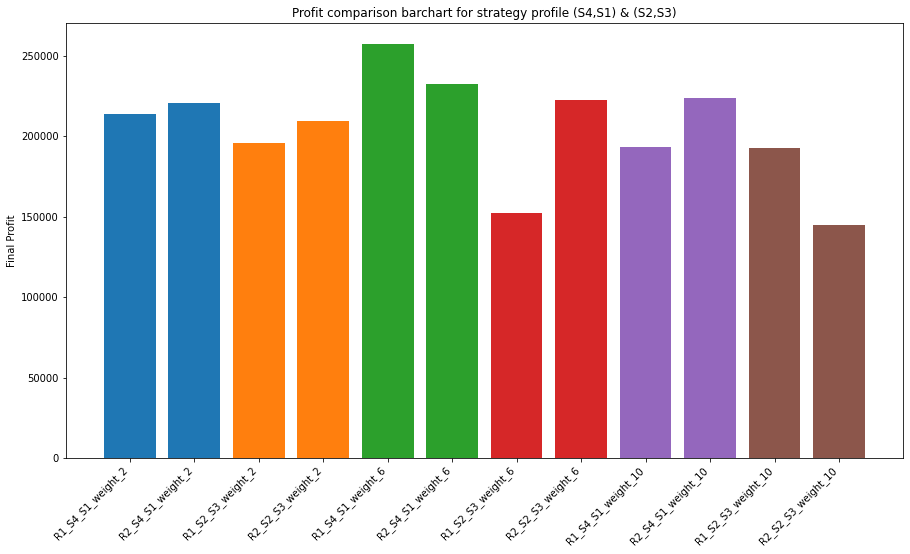

In [31]:
plot_combined_profit_graph(['S4_S1', 'S2_S3'], 'Profit comparison barchart for strategy profile (S4,S1) & (S2,S3)')

# Price Comparison (combined)

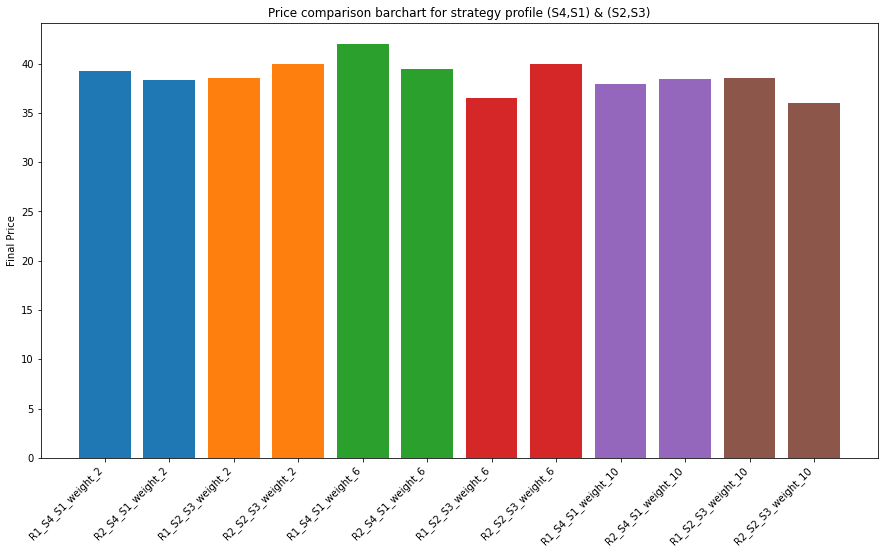

In [32]:
plot_combined_price_graph(['S4_S1', 'S2_S3'], 'Price comparison barchart for strategy profile (S4,S1) & (S2,S3)')

# Market Share Comparison (combined)

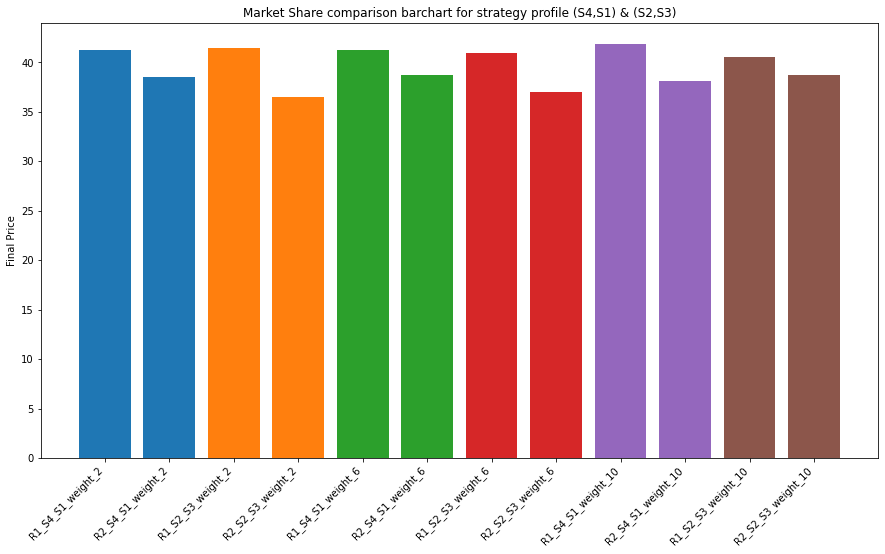

In [33]:
plot_combined_market_share_graph(['S4_S1', 'S2_S3'], 'Market Share comparison barchart for strategy profile (S4,S1) & (S2,S3)')


# Market Share comparison

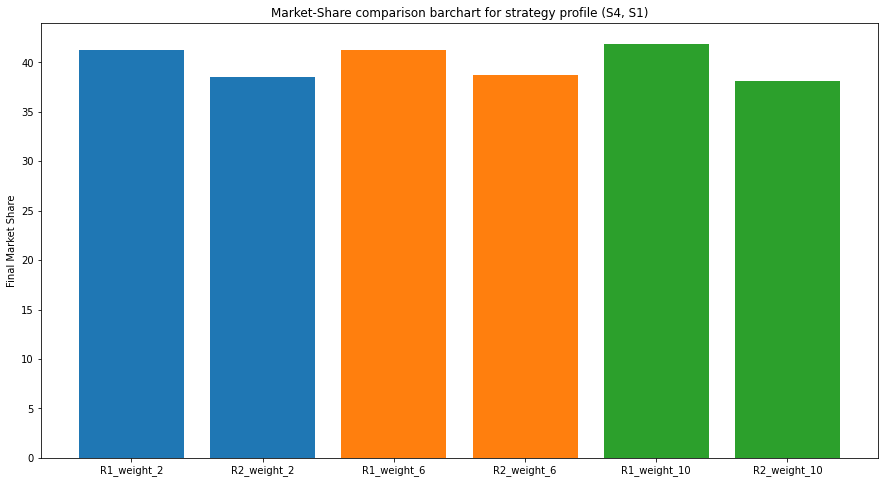

In [34]:
plot_distance_comparison_graph('S4_S1_D_', 'Market-Share comparison barchart for strategy profile (S4, S1)')

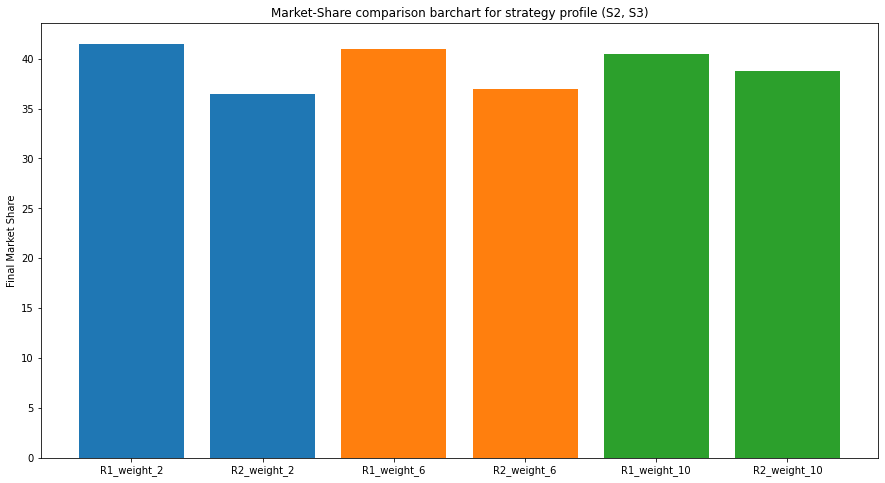

In [35]:
plot_distance_comparison_graph('S2_S3_D_', 'Market-Share comparison barchart for strategy profile (S2, S3)')

# Final Price comparison

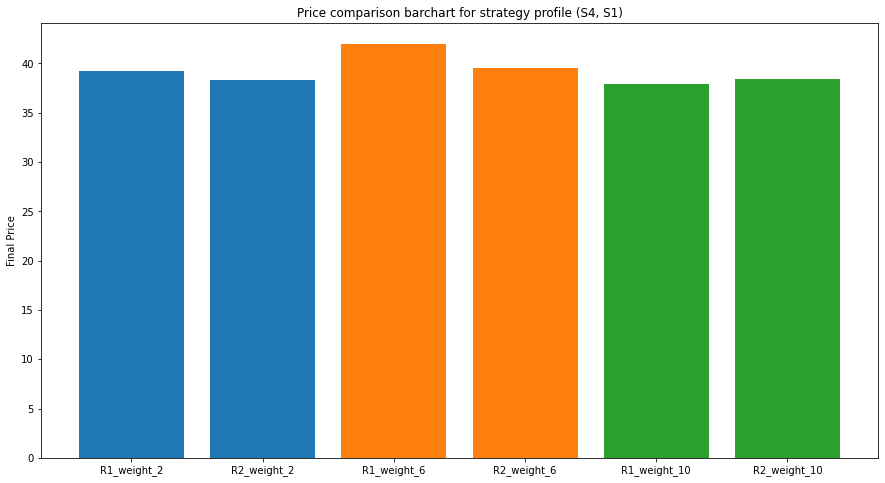

In [36]:
plot_price_comparison_graph('S4_S1_D_', 'Price comparison barchart for strategy profile (S4, S1)')

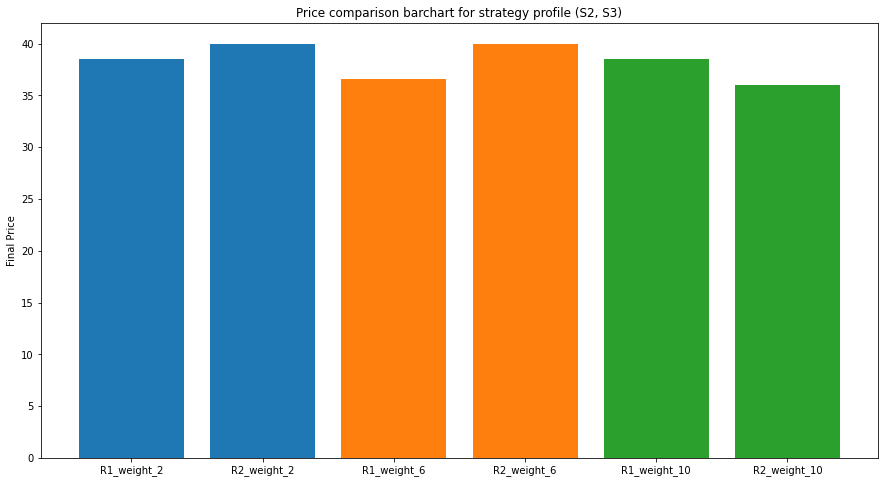

In [37]:
plot_price_comparison_graph('S2_S3_D_', 'Price comparison barchart for strategy profile (S2, S3)')

# Cumulative Profit comparison

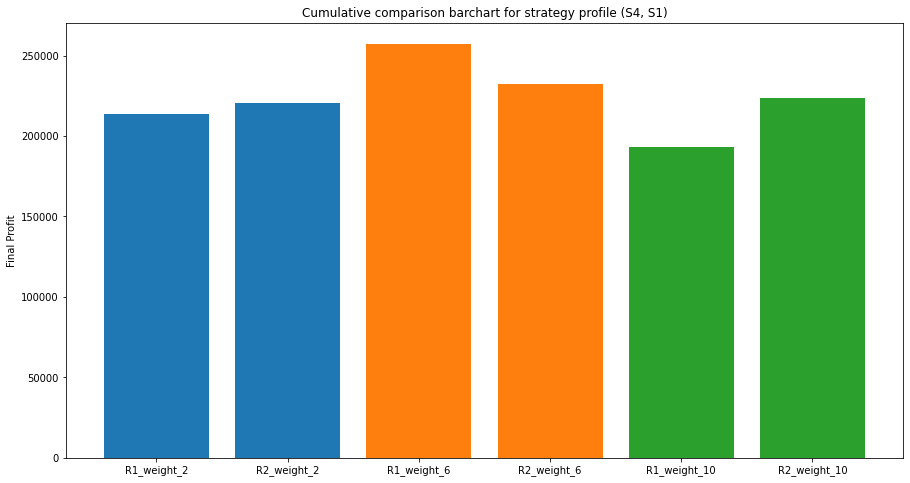

In [38]:
plot_profit_comparison_graph('S4_S1_D_', 'Cumulative comparison barchart for strategy profile (S4, S1)')

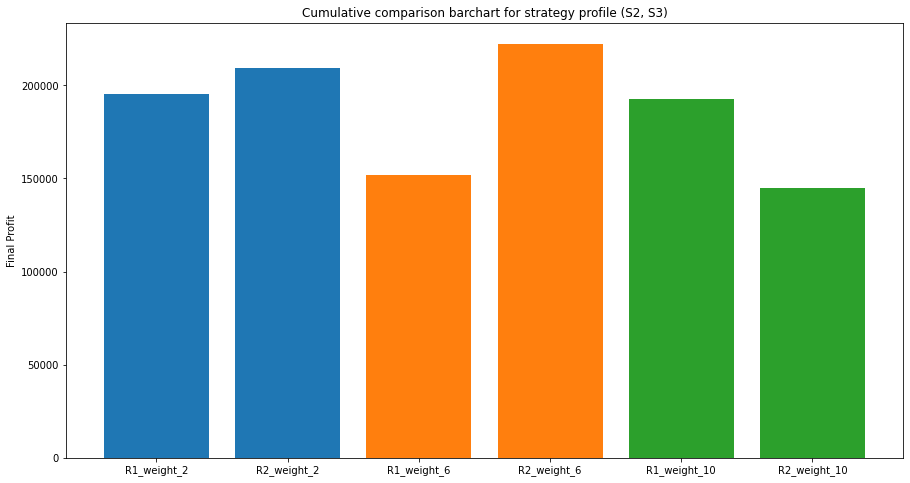

In [39]:
plot_profit_comparison_graph('S2_S3_D_', 'Cumulative comparison barchart for strategy profile (S2, S3)')